In [1]:
import warnings
warnings.filterwarnings("ignore") 

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from datetime import timedelta,datetime
df=pd.read_csv('C:\\workplace\\electricity_demand\\dataset\\AEP_hourly.csv')
df.columns=['date_time','aep_mw']
df['date_time']=pd.to_datetime(df['date_time'])
df.sort_values('date_time',ascending=True,inplace=True)
df['date_time']=df['date_time'].astype(str)

In [3]:
def preparion_train (df,num_lags,lag_feature):

    df_lags=pd.DataFrame(index=df.index,columns=['lags_{}'.format(i) for i in range(num_lags)])
    for i in range(num_lags):
        df_lags['lags_{}'.format(i)]=df[lag_feature].shift(i)
    
    df_targets=pd.DataFrame(index=df.index,columns=['step_{}'.format(i) for i in range(16,40)])
    for i in range(16,40):
        df_targets['step_{}'.format(i)]=df[lag_feature].shift(-i)
    
    df_processed=pd.concat([df[['date_time']],df_targets,df_lags],axis=1)
    #df_processed=df_processed[pd.to_datetime(df_processed['date_time']).dt.hour==trigerred_time]
    return df_processed.dropna()

# Train and Test split

In [4]:
from sklearn.preprocessing import PowerTransformer
scaler=PowerTransformer().fit(df.loc[df['date_time']<='2017-08-02 23:00:00',['aep_mw']])
df['scaled_aep_mw']=pd.Series(scaler.transform(df[['aep_mw']]).reshape(-1),index=df.index)
df.head()

,date_time,aep_mw,scaled_aep_mw
2183,2004-10-01 01:00:00,12379.0,-1.276695
2184,2004-10-01 02:00:00,11935.0,-1.492740
2185,2004-10-01 03:00:00,11692.0,-1.614218
2186,2004-10-01 04:00:00,11597.0,-1.662359
2187,2004-10-01 05:00:00,11681.0,-1.619773


In [5]:
df_processed=preparion_train (df,24*7*4,'scaled_aep_mw')
df_processed

,date_time,step_16,step_17,step_18,step_19,step_20,step_21,step_22,step_23,step_24,...,lags_662,lags_663,lags_664,lags_665,lags_666,lags_667,lags_668,lags_669,lags_670,lags_671
1558,2004-10-29 00:00:00,-0.105342,-0.080372,-0.156780,-0.092646,0.047289,-0.055106,-0.221166,-0.521421,-0.948255,...,-0.086704,-0.172414,-0.287848,-0.678168,-1.324226,-1.619773,-1.662359,-1.614218,-1.492740,-1.276695
1511,2004-10-29 01:00:00,-0.080372,-0.156780,-0.092646,0.047289,-0.055106,-0.221166,-0.521421,-0.948255,-1.362899,...,-0.037794,-0.086704,-0.172414,-0.287848,-0.678168,-1.324226,-1.619773,-1.662359,-1.614218,-1.492740
1512,2004-10-29 02:00:00,-0.156780,-0.092646,0.047289,-0.055106,-0.221166,-0.521421,-0.948255,-1.362899,-1.622300,...,0.014250,-0.037794,-0.086704,-0.172414,-0.287848,-0.678168,-1.324226,-1.619773,-1.662359,-1.614218
1513,2004-10-29 03:00:00,-0.092646,0.047289,-0.055106,-0.221166,-0.521421,-0.948255,-1.362899,-1.622300,-1.816869,...,0.025541,0.014250,-0.037794,-0.086704,-0.172414,-0.287848,-0.678168,-1.324226,-1.619773,-1.662359
1514,2004-10-29 04:00:00,0.047289,-0.055106,-0.221166,-0.521421,-0.948255,-1.362899,-1.622300,-1.816869,-1.954480,...,0.122440,0.025541,0.014250,-0.037794,-0.086704,-0.172414,-0.287848,-0.678168,-1.324226,-1.619773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116166,2018-08-01 05:00:00,0.422499,0.326766,-0.031118,-0.492645,-0.857230,-1.177993,-1.316519,-1.431649,-1.351272,...,1.752562,1.684811,1.543758,1.299653,0.911245,0.361544,-0.285804,-0.823321,-1.083602,-0.970080
116167,2018-08-01 06:00:00,0.326766,-0.031118,-0.492645,-0.857230,-1.177993,-1.316519,-1.431649,-1.351272,-1.087313,...,1.783070,1.752562,1.684811,1.543758,1.299653,0.911245,0.361544,-0.285804,-0.823321,-1.083602
116168,2018-08-01 07:00:00,-0.031118,-0.492645,-0.857230,-1.177993,-1.316519,-1.431649,-1.351272,-1.087313,-0.691662,...,1.749889,1.783070,1.752562,1.684811,1.543758,1.299653,0.911245,0.361544,-0.285804,-0.823321
116169,2018-08-01 08:00:00,-0.492645,-0.857230,-1.177993,-1.316519,-1.431649,-1.351272,-1.087313,-0.691662,-0.408344,...,1.652626,1.749889,1.783070,1.752562,1.684811,1.543758,1.299653,0.911245,0.361544,-0.285804


In [6]:
X_train=df_processed.loc[df_processed['date_time']<='2017-08-02 23:00:00',df_processed.columns[df_processed.columns.str.contains('lags_')]]
X_test=df_processed.loc[(df_processed['date_time']>='2017-08-02 08:00:00') &\
    (pd.to_datetime(df_processed['date_time']).dt.hour==8),df_processed.columns[df_processed.columns.str.contains('lags_')]]

y_train=df_processed.loc[df_processed['date_time']<='2017-08-02 23:00:00',df_processed.columns[df_processed.columns.str.contains('step_')]]
y_test=df_processed.loc[(df_processed['date_time']>='2017-08-02 08:00:00') &\
    (pd.to_datetime(df_processed['date_time']).dt.hour==8),df_processed.columns[df_processed.columns.str.contains('step_')]]

# Hyperparameter tuning

In [7]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

In [8]:
from sklearn.model_selection import train_test_split 
X_fit,X_val,y_fit,y_val=train_test_split(X_train,y_train,test_size=0.3,shuffle=False)

In [9]:
stoppage_rule=EarlyStopping(patience=10,monitor='val_loss')

In [10]:
def val_fun(X,y,val_data,num_layers,num_nerons,alpha,iter,stoppage_rule):

    model=Sequential()
    model.add(Input(X.shape[1],))
    
    for i in range(num_layers):
        model.add(Dense(units=num_nerons,activation='relu'))
    
    model.add(Dense(units=24))
    
    model.compile(optimizer=Adam(learning_rate=alpha),loss='mse')
    model.fit(X,y,validation_data=val_data,epochs=iter,callbacks=[stoppage_rule],batch_size=672)

    val_df=pd.DataFrame(model.history.history)

    error=np.min(val_df.iloc[:,1])
    best_iter=np.argmin(val_df.iloc[:,1])+1

    return {'min_loss':error,'model_params':{'num_layers':num_layers,'units':num_nerons,'learning_rate':alpha,'epochs':best_iter}}
    

In [11]:
model_dict={}
num_layers=[1,2]
num_neurons=[64,128,256]
alpha=[0.001,0.00001]
count=1
for i in num_layers:
    for j in num_neurons:
        for a in alpha:
            model_dict['model_{}'.format(count)]=val_fun(X_fit,y_fit,(X_val,y_val),i,j,a,1000,stoppage_rule)
            print(count)
            count=count+1


Epoch 1/1000
117/117 [==============================] - 2s 11ms/step - loss: 0.3863 - val_loss: 0.2699
Epoch 2/1000
117/117 [==============================] - 1s 7ms/step - loss: 0.2008 - val_loss: 0.2275
Epoch 3/1000
117/117 [==============================] - 1s 7ms/step - loss: 0.1787 - val_loss: 0.2104
Epoch 4/1000
117/117 [==============================] - 1s 6ms/step - loss: 0.1678 - val_loss: 0.2122
Epoch 5/1000
117/117 [==============================] - 1s 8ms/step - loss: 0.1614 - val_loss: 0.1957
Epoch 6/1000
117/117 [==============================] - 1s 7ms/step - loss: 0.1557 - val_loss: 0.1917
Epoch 7/1000
117/117 [==============================] - 1s 7ms/step - loss: 0.1529 - val_loss: 0.1956
Epoch 8/1000
117/117 [==============================] - 1s 7ms/step - loss: 0.1496 - val_loss: 0.1951
Epoch 9/1000
117/117 [==============================] - 1s 6ms/step - loss: 0.1469 - val_loss: 0.1887
Epoch 10/1000
117/117 [==============================] - 1s 6ms/step - loss: 0.14

In [13]:
model_dict

{'model_1': {'min_loss': 0.18096458911895752,
  'model_params': {'num_layers': 1,
   'units': 64,
   'learning_rate': 0.001,
   'epochs': 18}},
 'model_2': {'min_loss': 0.1818551868200302,
  'model_params': {'num_layers': 1,
   'units': 64,
   'learning_rate': 1e-05,
   'epochs': 350}},
 'model_3': {'min_loss': 0.18645504117012024,
  'model_params': {'num_layers': 1,
   'units': 128,
   'learning_rate': 0.001,
   'epochs': 20}},
 'model_4': {'min_loss': 0.18577928841114044,
  'model_params': {'num_layers': 1,
   'units': 128,
   'learning_rate': 1e-05,
   'epochs': 252}},
 'model_5': {'min_loss': 0.19195958971977234,
  'model_params': {'num_layers': 1,
   'units': 256,
   'learning_rate': 0.001,
   'epochs': 12}},
 'model_6': {'min_loss': 0.19121557474136353,
  'model_params': {'num_layers': 1,
   'units': 256,
   'learning_rate': 1e-05,
   'epochs': 209}},
 'model_7': {'min_loss': 0.18642765283584595,
  'model_params': {'num_layers': 2,
   'units': 64,
   'learning_rate': 0.001,
   'e

# Fitting a model

In [14]:
model=Sequential()
model.add(Input(X_train.shape[1],))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=24))
model.compile(optimizer=Adam(learning_rate=0.001),loss='mse')
model.fit(X_train,y_train,epochs=18,validation_data=(X_test,y_test),batch_size=672)
pred=model.predict(X_test)

Epoch 1/18
167/167 [==============================] - 1s 6ms/step - loss: 0.3346 - val_loss: 0.2360
Epoch 2/18
167/167 [==============================] - 1s 5ms/step - loss: 0.1934 - val_loss: 0.2235
Epoch 3/18
167/167 [==============================] - 1s 4ms/step - loss: 0.1770 - val_loss: 0.2146
Epoch 4/18
167/167 [==============================] - 1s 5ms/step - loss: 0.1682 - val_loss: 0.2099
Epoch 5/18
167/167 [==============================] - 1s 5ms/step - loss: 0.1629 - val_loss: 0.2072
Epoch 6/18
167/167 [==============================] - 1s 4ms/step - loss: 0.1577 - val_loss: 0.2091
Epoch 7/18
167/167 [==============================] - 1s 4ms/step - loss: 0.1551 - val_loss: 0.1947
Epoch 8/18
167/167 [==============================] - 1s 4ms/step - loss: 0.1525 - val_loss: 0.2039
Epoch 9/18
167/167 [==============================] - 1s 5ms/step - loss: 0.1501 - val_loss: 0.2004
Epoch 10/18
167/167 [==============================] - 1s 5ms/step - loss: 0.1484 - val_loss: 0.1961

In [15]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 64)                43072     
                                                                 
 dense_31 (Dense)            (None, 24)                1560      
                                                                 
Total params: 44,632
Trainable params: 44,632
Non-trainable params: 0
_________________________________________________________________


In [16]:
pred2=pred.reshape(-1,1)
pred2=scaler.inverse_transform(pred2)
pred2=pd.Series(pred2.reshape(-1))

actual=df.loc[df['date_time']>='2017-08-03 00:00:00','aep_mw']
actual.index=range(len(actual))
actual.drop(8760,inplace=True)
pred_df=pd.concat([actual,pred2],axis=1)
pred_df.columns=['aep_mw','forecast']
pred_df.index=df.loc[df['date_time']>='2017-08-03 00:00:00']['date_time'].iloc[:8760]

In [17]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(actual,pred2)

0.05840414624950093

In [18]:
import plotly.graph_objects as go
figure=go.Figure()
figure.add_trace(go.Scatter(x=df['date_time'].tail(len(pred2)),y=pred_df['aep_mw'],name='actual_electricity_load'))
figure.add_trace(go.Scatter(x=df['date_time'].tail(len(pred2)),y=pred_df['forecast'],name='mlp_forecast'))

<Axes: xlabel='date_time'>

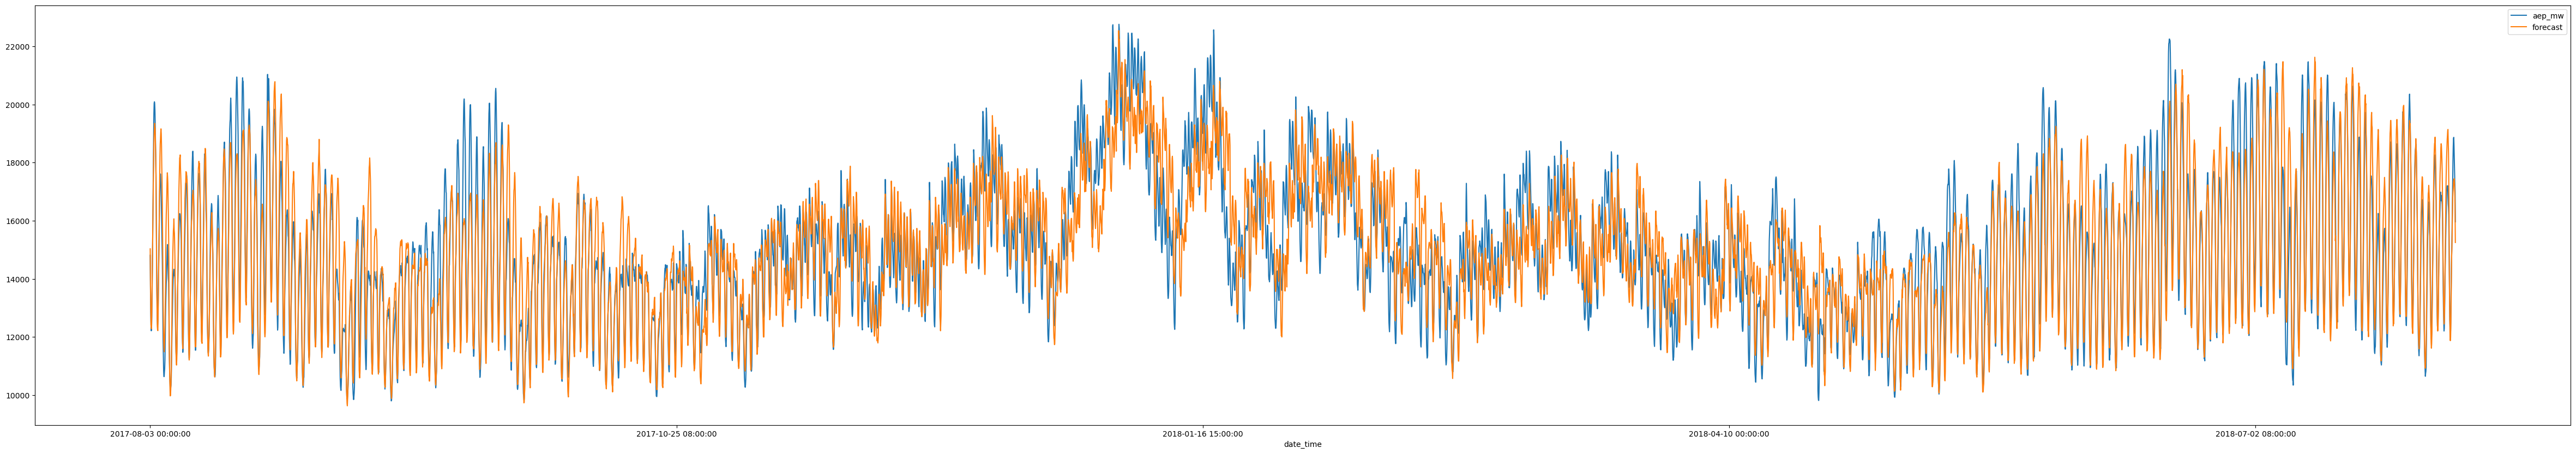

In [19]:
pred_df.plot(figsize=(60,10))